Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
# Load the insurance data

df = pd.read_csv('../data/dataset.txt', sep='|', low_memory=False)

df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


4.1 Data Summarization

Descriptive Statistics

In [3]:
# Descriptive statistics for numerical columns
numerical_cols = ['mmcode', 'Cylinders', 'cubiccapacity', 'kilowatts', 
                  'NumberOfDoors', 'NumberOfVehiclesInFleet', 'SumInsured', 
                  'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']

summary_stats = df[numerical_cols].describe()

summary_stats

,mmcode,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,9.995460e+05,999546.000000,999546.000000,999546.000000,999546.000000,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,5.487770e+07,4.046642,2466.743258,97.207919,4.019250,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,1.360381e+07,0.294020,442.800640,19.393256,0.468314,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,4.041200e+06,0.000000,0.000000,0.000000,0.000000,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,6.005692e+07,4.000000,2237.000000,75.000000,4.000000,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,6.005842e+07,4.000000,2694.000000,111.000000,4.000000,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,6.005842e+07,4.000000,2694.000000,111.000000,4.000000,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,6.506535e+07,10.000000,12880.000000,309.000000,6.000000,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [4]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [7]:
# Convert TransactionMonth to datetime if it's stored as object
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Check if TransactionMonth is properly formatted
df['TransactionMonth'].head()

0   2015-03-01
1   2015-05-01
2   2015-07-01
3   2015-05-01
4   2015-07-01
Name: TransactionMonth, dtype: datetime64[ns]

4.2 Data Quality Assessment

In [8]:
missing_values = df.isnull().sum()
missing_values

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [9]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

UnderwrittenCoverID           0.000000
PolicyID                      0.000000
TransactionMonth              0.000000
IsVATRegistered               0.000000
Citizenship                   0.000000
LegalType                     0.000000
Title                         0.000000
Language                      0.000000
Bank                         14.594670
AccountType                   4.022806
MaritalStatus                 0.825819
Gender                        0.953507
Country                       0.000000
Province                      0.000000
PostalCode                    0.000000
MainCrestaZone                0.000000
SubCrestaZone                 0.000000
ItemType                      0.000000
mmcode                        0.055195
VehicleType                   0.055195
RegistrationYear              0.000000
make                          0.055195
Model                         0.055195
Cylinders                     0.055195
cubiccapacity                 0.055195
kilowatts                

In [10]:
# Set the threshold to 80%
threshold = 0.8

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean()

# Drop columns with more than 80% missing values
df = df.drop(columns=missing_percentage[missing_percentage > threshold].index)

# Display the resulting DataFrame
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [11]:
# Fill numerical columns with the mean
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Display the updated DataFrame
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [12]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims'],
      dtype='object')

4.3 Univariate Analysis Distribution of Variables

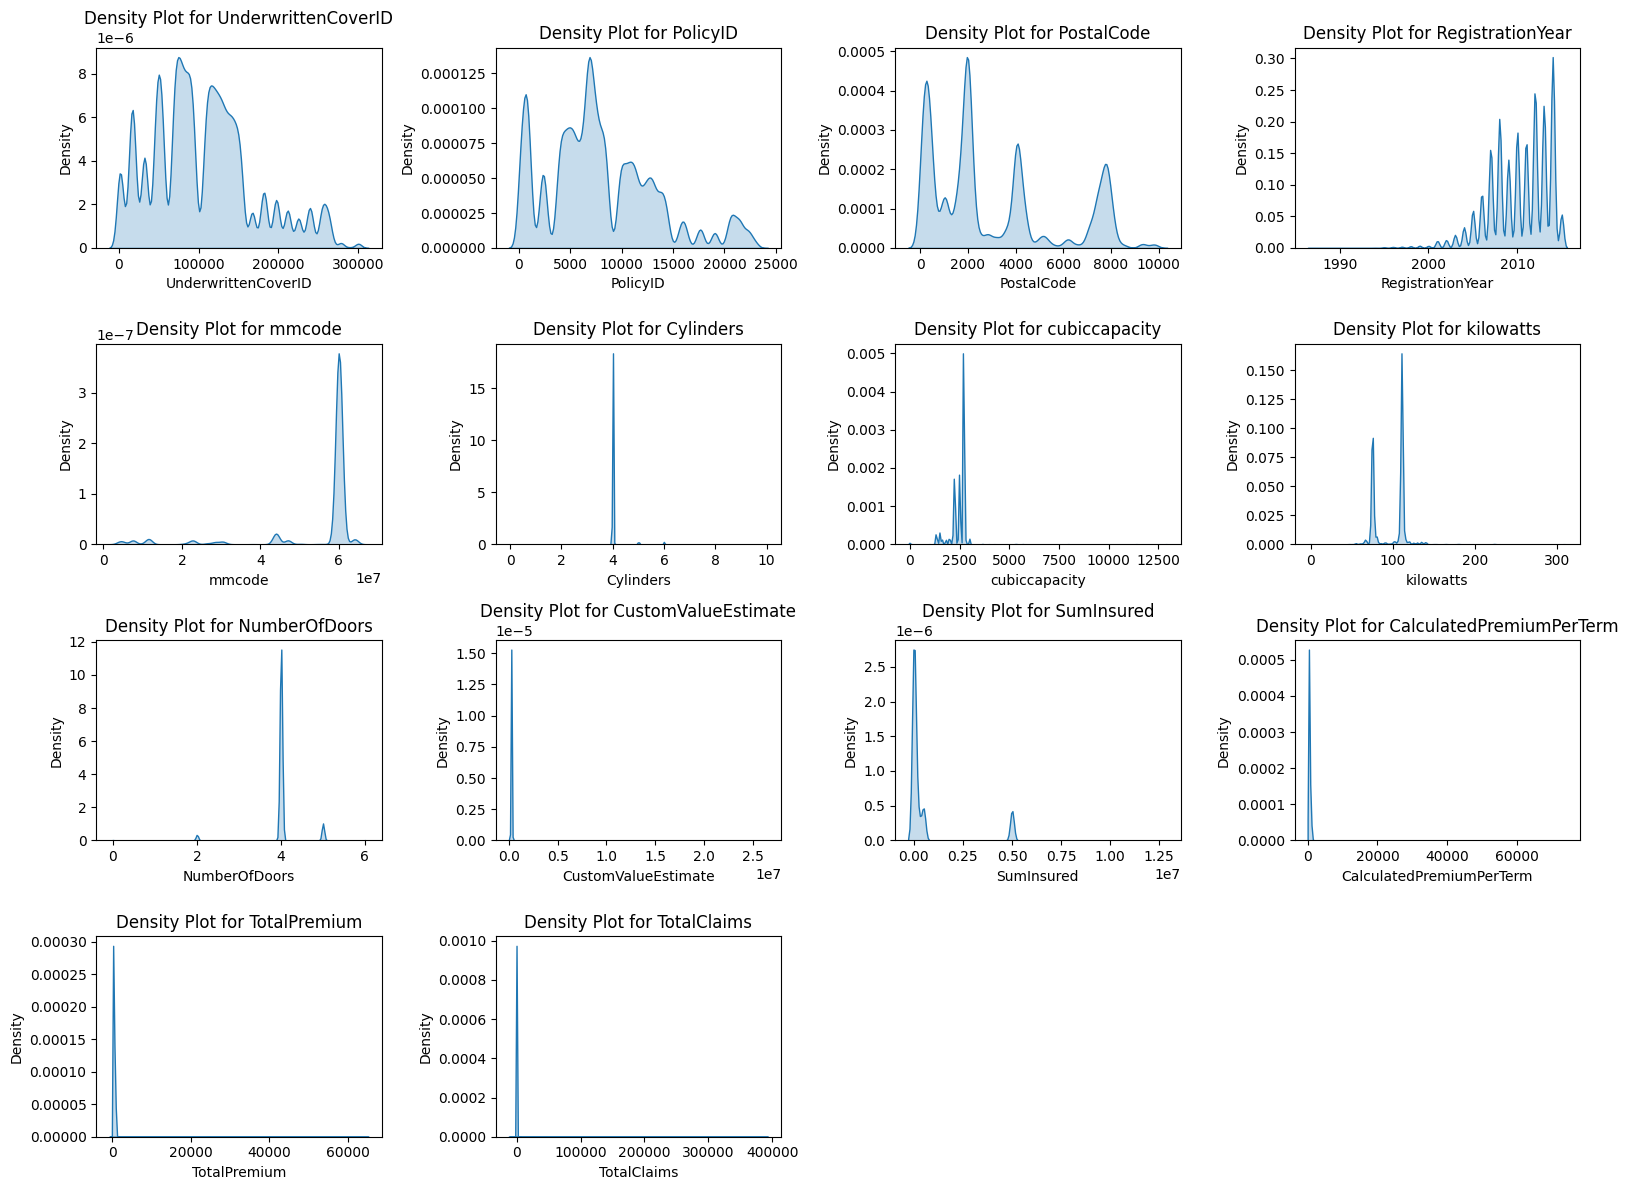

In [13]:
# List of numeric columns (int64 and float64)
numeric_columns = [
    'UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'RegistrationYear',
    'mmcode', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors',
    'CustomValueEstimate','SumInsured',
    'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims'
]

# Set up the plotting grid
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)  # Adjust the grid size based on the number of plots
    sns.kdeplot(df[col].dropna(), fill=True)  # Drop NaN values and plot the density
    plt.title(f'Density Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

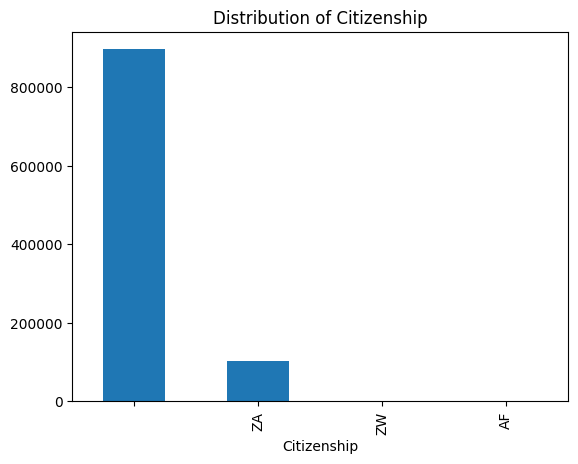

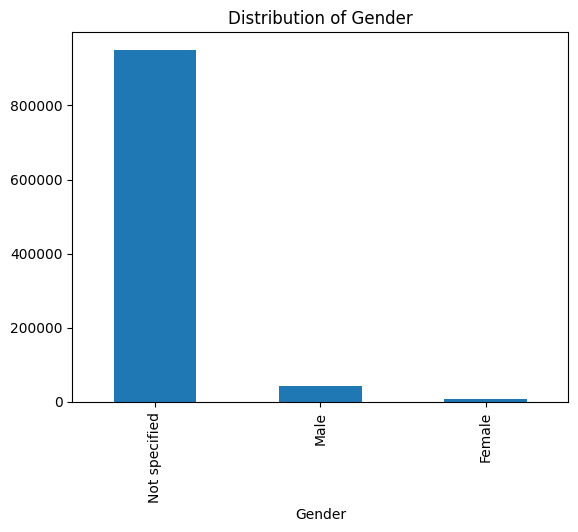

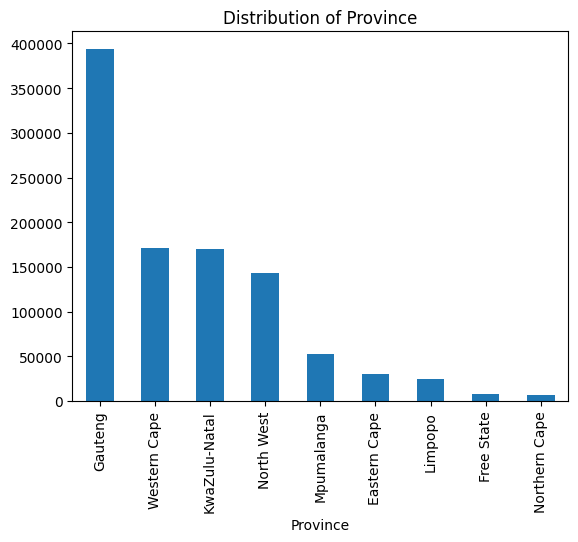

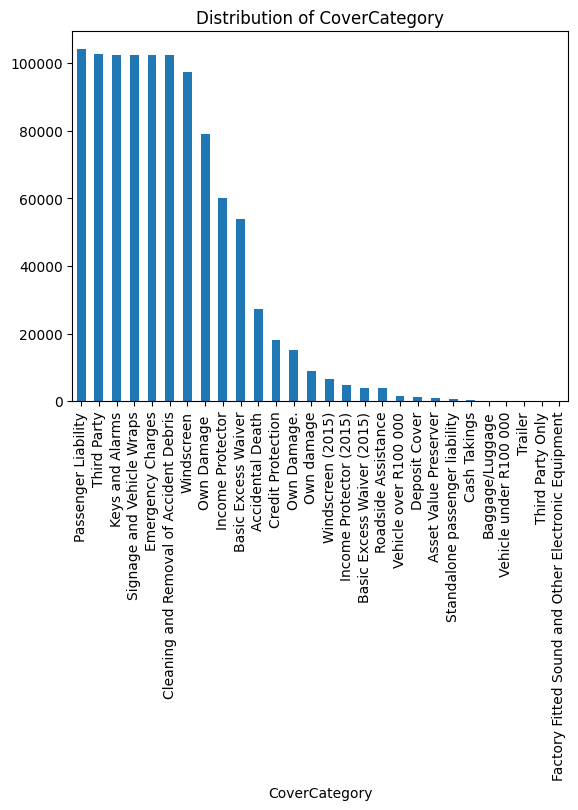

In [14]:
# Bar plot for categorical data
categorical_cols = ['Citizenship', 'Gender', 'Province', 'CoverCategory']
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

4.4 Bivariate or Multivariate Analysis

Correlations and Associations

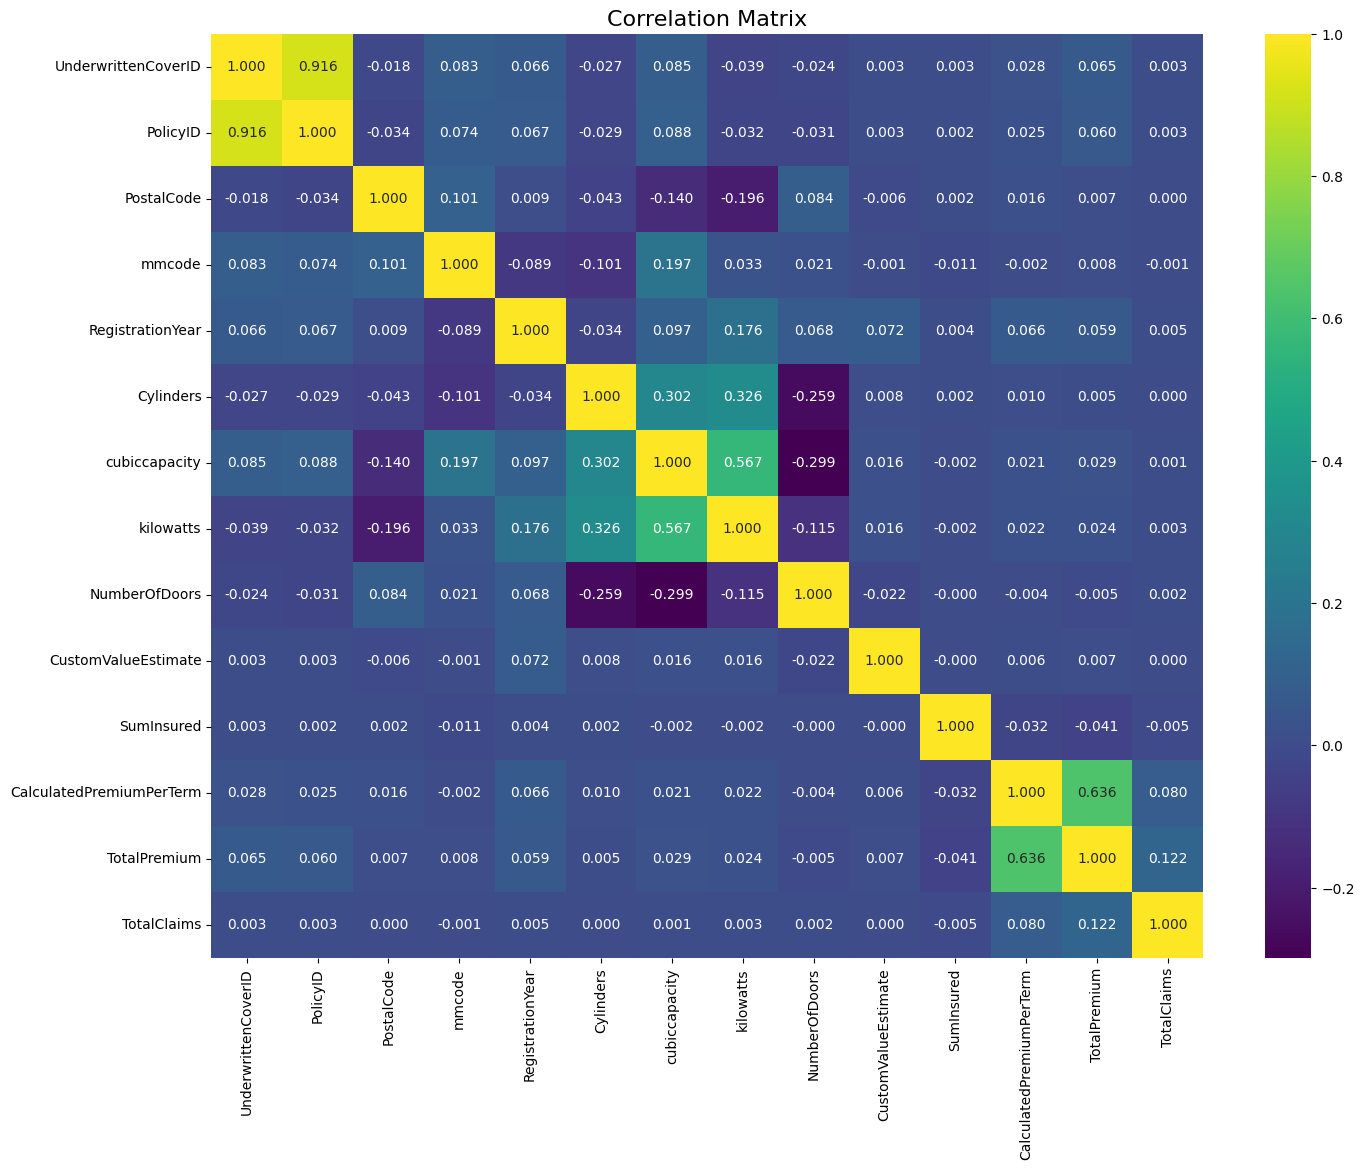

In [15]:
# Correlation matrix for numerical columns
corr_matrix = df[numerical_cols].corr()

# Set the figure size to be larger
plt.figure(figsize=(16, 12))  # Increase figure size
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='viridis')

# Add title and display the plot
plt.title('Correlation Matrix', fontsize=16)
plt.show()

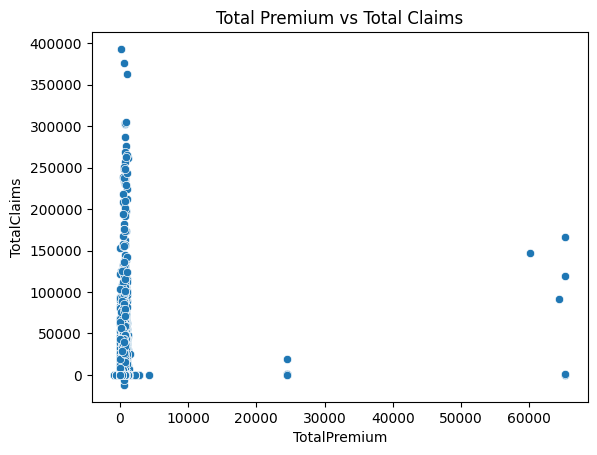

In [16]:
# Scatter plot for TotalPremium vs TotalClaims
plt.figure()
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df)
plt.title('Total Premium vs Total Claims')
plt.show()

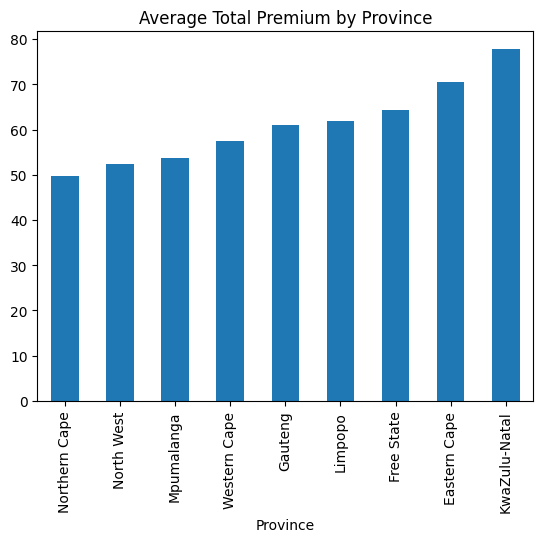

In [17]:
# Average premium by province
province_premium = df.groupby('Province')['TotalPremium'].mean().sort_values()
province_premium.plot(kind='bar')
plt.title('Average Total Premium by Province')
plt.show()

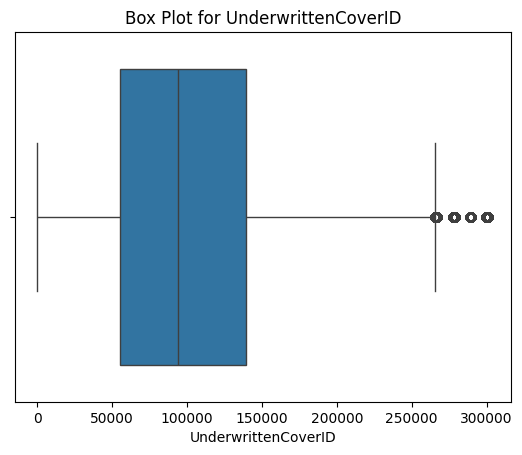

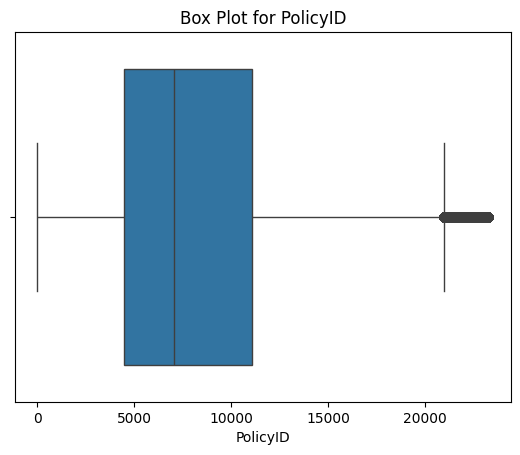

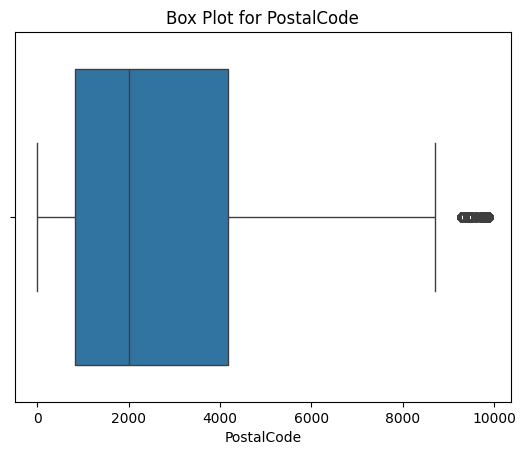

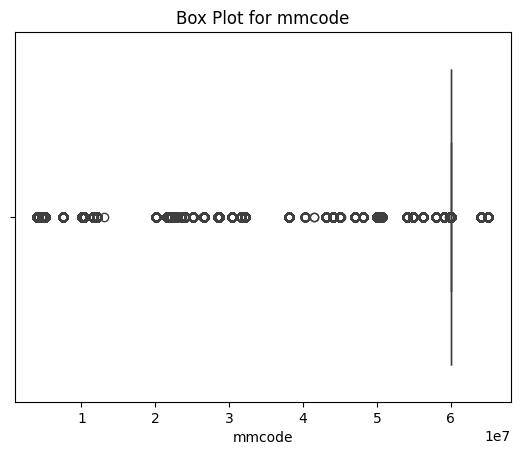

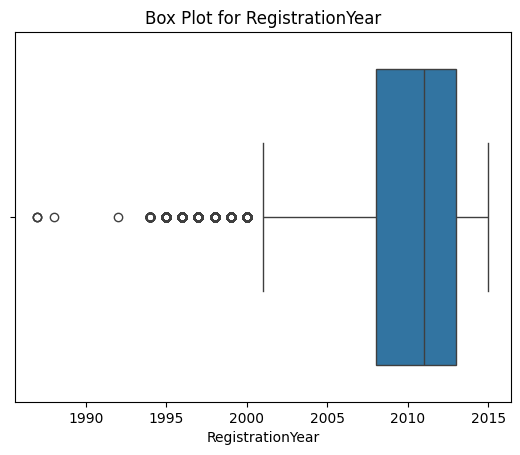

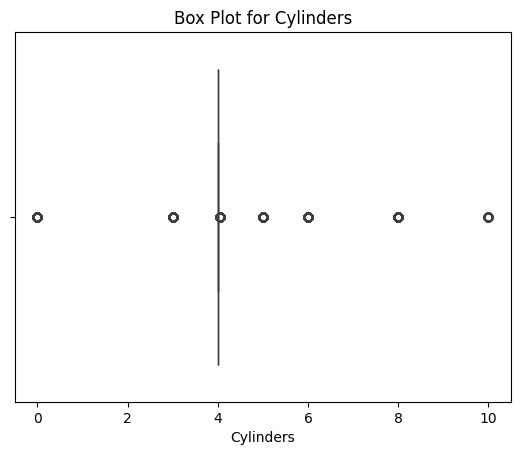

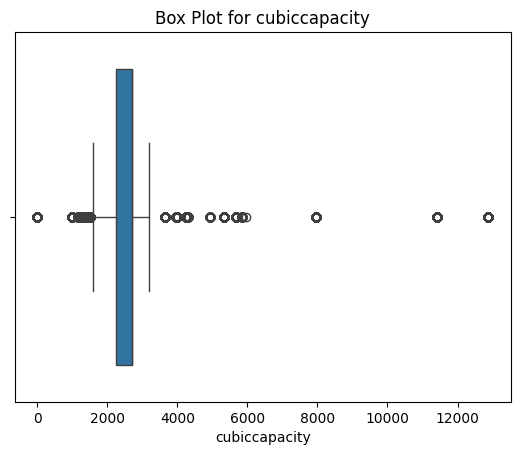

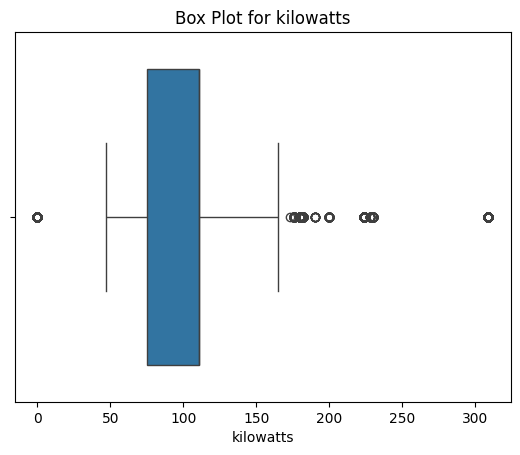

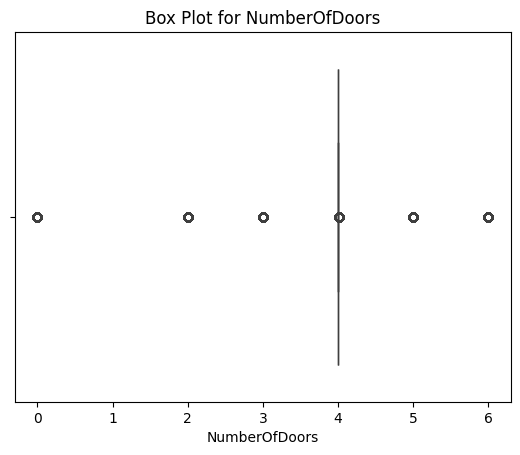

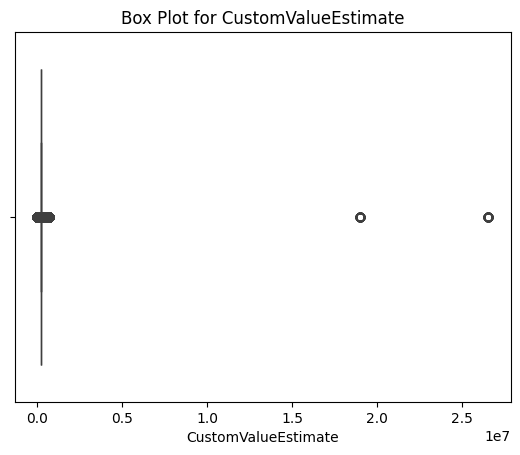

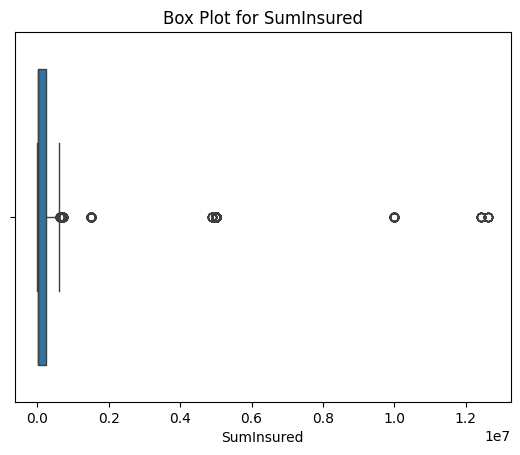

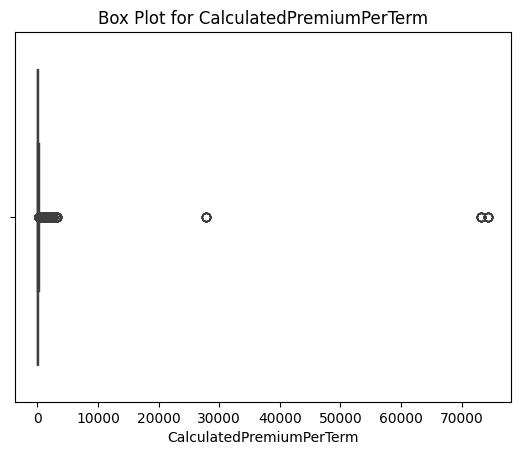

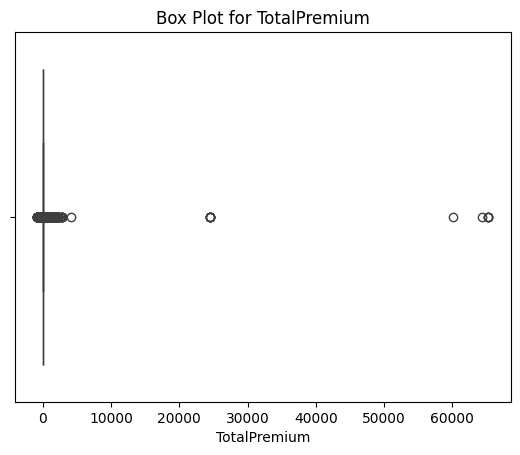

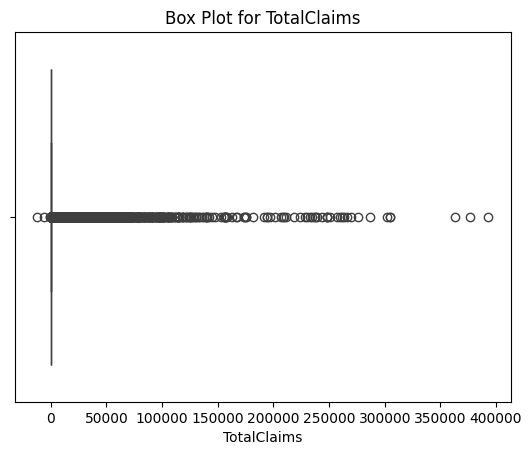

In [18]:
# Box plots for detecting outliers
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

4.7 Visualization Creative and Insightful Plots

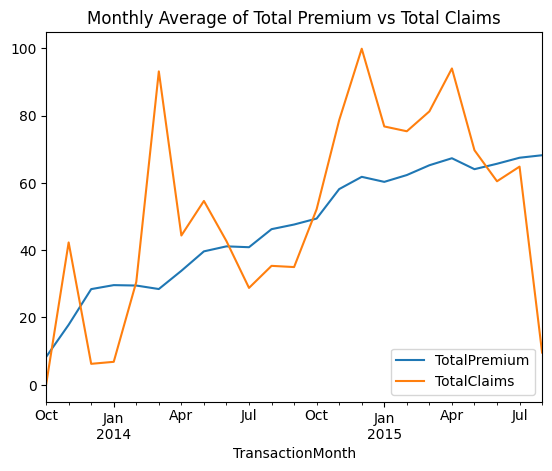

In [19]:
# Premium and Claims Over Time
df.groupby(df['TransactionMonth'].dt.to_period("M"))[['TotalPremium', 'TotalClaims']].mean().plot()
plt.title('Monthly Average of Total Premium vs Total Claims')
plt.show()

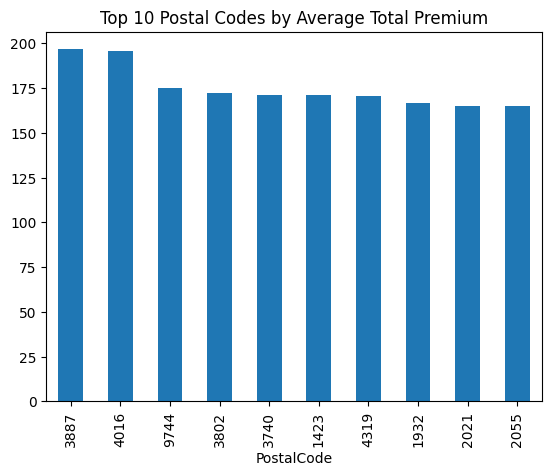

In [20]:
# Compare average TotalPremium by PostalCode
postal_premium = df.groupby('PostalCode')['TotalPremium'].mean().sort_values(ascending=False).head(10)
postal_premium.plot(kind='bar')
plt.title('Top 10 Postal Codes by Average Total Premium')
plt.show()